In [3]:
import pandas as pd
import numpy as np

In [4]:
iris_dataset = pd.read_csv('iris.csv')
iris_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
X = iris_dataset.iloc[ :, 0:4]
y = iris_dataset.iloc[ :, 4]
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 4)
y shape: (150,)


In [6]:
# Standardization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(f'Standardized Attributes: \n {pd.DataFrame(X_std).head()}\n')

Standardized Attributes: 
           0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444



In [7]:
# Covariance Matrix that will be columns dataset size ([4x4])
cov_mat_transposed = np.cov(X_std.T)
print(f"covariance_matrix:\n  {cov_mat_transposed}")

covariance_matrix:
  [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [8]:
# caculating the EigenValues and EigenVectors based on covariance transposed matrix

from numpy import linalg
eigen_values, eigen_vectors = linalg.eig(cov_mat_transposed)

print(f"Eigen Velues: \n{eigen_values}\n\n")
print(f"Eigen Vectors:\n {eigen_vectors}")


Eigen Velues: 
[2.93808505 0.9201649  0.14774182 0.02085386]


Eigen Vectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [9]:
# Checking the validation of Eigenvector 

ev_t_squered=np.square(eigen_vectors.T)
res = [ev_t_squered[:][i].sum() for i in range(eigen_values.size)]

print(f"The sum of the each row (must be equal 1):\n {np.array(res)}")


The sum of the each row (must be equal 1):
 [1. 1. 1. 1.]


In [10]:
# Matrix decomposition by PCA
weight_matrix=np.array([eigen_vectors.T[0],eigen_vectors.T[1]]).T
# weighted_matrix.shape is: (4,2)

# Calculate classified dataset
weighted_matrix = X_std.dot(weight_matrix)
proj_dataset = pd.DataFrame (data = weighted_matrix, columns=['PC1', 'PC2'])
print(f"new dataset size: {proj_dataset.shape} ")
proj_dataset.head()


new dataset size: (150, 2) 


,PC1,PC2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835


In [11]:
# In the end we will concatinate target column[150x1] with proj_dataset  [150x2]
final_dataset = pd.concat([proj_dataset,pd.DataFrame(y,columns=['variety'])],axis=1)
final_dataset.head()

,PC1,PC2,variety
0,-2.264703,-0.480027,Setosa
1,-2.080961,0.674134,Setosa
2,-2.364229,0.341908,Setosa
3,-2.299384,0.597395,Setosa
4,-2.389842,-0.646835,Setosa


In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid",palette="muted")
# plot = sns.swarmplot(data=final_dataset, x="PC1", y="PC2", hue="variety")

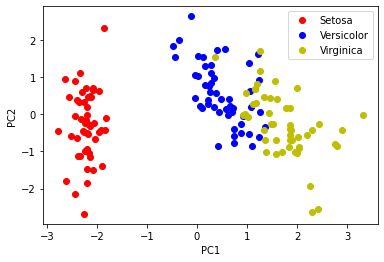

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
target_col = final_dataset['variety']
colors = [*'rby']
for class_,color in zip(np.unique(target_col),colors):
    plt.plot(final_dataset.loc[target_col==class_,'PC1'], final_dataset.loc[target_col==class_,'PC2'],f'{color}o',label = class_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()